In [98]:
import pandas as pd
import numpy as np
import warnings
from pandas.io.json import json_normalize
import seaborn
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.style.use('ggplot')
warnings.filterwarnings('ignore')


In [13]:
df = pd.read_csv("../data/train.csv")

In [7]:
df.tail()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
903648,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5123779100307500332,"{""continent"": ""Americas"", ""subContinent"": ""Car...",5123779100307500332_1483554750,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""17"", ""pageviews"": ""15...","{""referralPath"": ""/yt/about/"", ""campaign"": ""(n...",1483554750,1,1483554750
903649,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",7231728964973959842,"{""continent"": ""Asia"", ""subContinent"": ""Souther...",7231728964973959842_1483543798,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""18"", ""pageviews"": ""13...","{""referralPath"": ""/yt/about/"", ""campaign"": ""(n...",1483543798,1,1483543798
903650,Social,20170104,"{""browser"": ""Android Webview"", ""browserVersion...",5744576632396406899,"{""continent"": ""Asia"", ""subContinent"": ""Eastern...",5744576632396406899_1483526434,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""24"", ""pageviews"": ""21...","{""referralPath"": ""/yt/about/ko/"", ""campaign"": ...",1483526434,1,1483526434
903651,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2709355455991750775,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",2709355455991750775_1483592857,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""24"", ""pageviews"": ""22...","{""referralPath"": ""/l.php"", ""campaign"": ""(not s...",1483592857,1,1483592864
903652,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",814900163617805053,"{""continent"": ""Americas"", ""subContinent"": ""Cen...",0814900163617805053_1483574474,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""31"", ""pageviews"": ""31...","{""referralPath"": ""/yt/about/es-419/"", ""campaig...",1483574474,1,1483574474


- Total rows : 903,651
- Repeated Column : device, geoNetwork, totals, trafficSource
    - Need to flatten!

In [15]:
df['device'][0]

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

- In device column, we can use 'browser', 'operatingSystem', 'isMobile', 'deviceCategory', ....

In [9]:
df['geoNetwork'][0]

'{"continent": "Asia", "subContinent": "Western Asia", "country": "Turkey", "region": "Izmir", "metro": "(not set)", "city": "Izmir", "cityId": "not available in demo dataset", "networkDomain": "ttnet.com.tr", "latitude": "not available in demo dataset", "longitude": "not available in demo dataset", "networkLocation": "not available in demo dataset"}'

- In getoNetwork column, we can use 'contient', 'subContinent', 'country', 'region', 'metro', 'city', 'networkDomain', ...
    - Don't use 'latitude' and 'longitude'

In [10]:
df['totals'][0]

'{"visits": "1", "hits": "1", "pageviews": "1", "bounces": "1", "newVisits": "1"}'

- In totals column, we can use all('visits', 'hits', 'pageviews', 'bounces', 'netVisits')
- But 'visits', 'bounces', 'newVisits' is full of one value

In [11]:
df['trafficSource'][0]

'{"campaign": "(not set)", "source": "google", "medium": "organic", "keyword": "(not provided)", "adwordsClickInfo": {"criteriaParameters": "not available in demo dataset"}}'

- In trafficSource, we can use 'campaign', 'source', 'medium', 'keyword'
    - 'adworkdsClickInfo is repeated column, but.. we can't use 'criterialParameters'

In [29]:
# https://www.kaggle.com/julian3833/1-quick-start-read-csv-and-flatten-json-fields
JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
def load_df(csv_path='../data/train.csv'):

    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'})
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)

    return df

In [34]:
%%time
train = load_df("../data/train.csv")

CPU times: user 2min 17s, sys: 6.18 s, total: 2min 24s
Wall time: 2min 24s


In [35]:
%%time
test = load_df("../data/test.csv")

CPU times: user 2min 9s, sys: 7.08 s, total: 2min 16s
Wall time: 2min 19s


In [37]:
train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [39]:
cols_to_drop = [col for col in train.columns if train[col].nunique() == 1]

In [44]:
cols_to_drop

['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.bounces',
 'totals.newVisits',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters',
 'trafficSource.adwordsClickInfo.isVideoAd',
 'trafficSource.campaignCode',
 'trafficSource.isTrueDirect']

In [51]:
train.drop(cols_to_drop, axis=1, inplace=True)
test.drop([col for col in cols_to_drop if col in test.columns], axis=1, inplace=True)
print(f'Dropped {len(cols_to_drop)} columns.')

Dropped 24 columns.


In [55]:
train.tail()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,...,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
903648,Social,20170104,5123779100307500332,5123779100307500332_1483554750,1483554750,1,1483554750,Chrome,desktop,False,...,NaN,NaN,NaN,NaN,NaN,(not set),NaN,referral,/yt/about/,youtube.com
903649,Social,20170104,7231728964973959842,7231728964973959842_1483543798,1483543798,1,1483543798,Chrome,mobile,True,...,NaN,NaN,NaN,NaN,NaN,(not set),NaN,referral,/yt/about/,youtube.com
903650,Social,20170104,5744576632396406899,5744576632396406899_1483526434,1483526434,1,1483526434,Android Webview,mobile,True,...,NaN,NaN,NaN,NaN,NaN,(not set),NaN,referral,/yt/about/ko/,youtube.com
903651,Social,20170104,2709355455991750775,2709355455991750775_1483592857,1483592857,1,1483592864,Chrome,desktop,False,...,NaN,NaN,NaN,NaN,NaN,(not set),NaN,referral,/l.php,facebook.com
903652,Social,20170104,0814900163617805053,0814900163617805053_1483574474,1483574474,1,1483574474,Chrome,mobile,True,...,NaN,NaN,NaN,NaN,NaN,(not set),NaN,referral,/yt/about/es-419/,youtube.com


In [61]:
train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.hits', 'totals.pageviews',
       'totals.transactionRevenue', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.keyword', 'trafficSource.medium',
       'trafficSource.referralPath', 'trafficSource.source'],
      dtype='object')

In [91]:
column_names = ['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
               'visitNumber', 'visitStartTime', 'device.browser',
               'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
               'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
               'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
               'geoNetwork.subContinent', 'totals.hits', 'totals.pageviews',
               'totals.transactionRevenue', 'trafficSource.adContent',
               'trafficSource.adwordsClickInfo.adNetworkType',
               'trafficSource.adwordsClickInfo.gclId',
               'trafficSource.adwordsClickInfo.page',
               'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
               'trafficSource.keyword', 'trafficSource.medium',
               'trafficSource.referralPath', 'trafficSource.source']

In [93]:
len(column_names)

31

In [95]:
for col in column_names:
    print(f'=== column name : {col}, len of values : {len(train[col].value_counts())} ===')
    print(train[col].value_counts().head())
    print('\n')


=== column name : channelGrouping, len of values : 8 ===
Organic Search    381561
Social            226117
Direct            143026
Referral          104838
Paid Search        25326
Name: channelGrouping, dtype: int64


=== column name : date, len of values : 366 ===
20161128    4807
20161115    4685
20161114    4466
20161130    4435
20161026    4375
Name: date, dtype: int64


=== column name : fullVisitorId, len of values : 714167 ===
1957458976293878100    278
0824839726118485274    255
3608475193341679870    201
1856749147915772585    199
3269834865385146569    155
Name: fullVisitorId, dtype: int64


=== column name : sessionId, len of values : 902755 ===
1574537119069392775_1479455973    2
1038892828222807969_1470898794    2
1538217194111450513_1473317622    2
18890485090981787_1474526161      2
6918585936652172007_1471675594    2
Name: sessionId, dtype: int64


=== column name : visitId, len of values : 886303 ===
1493146175    8
1484649802    6
1478345904    6
1481369525    6
149

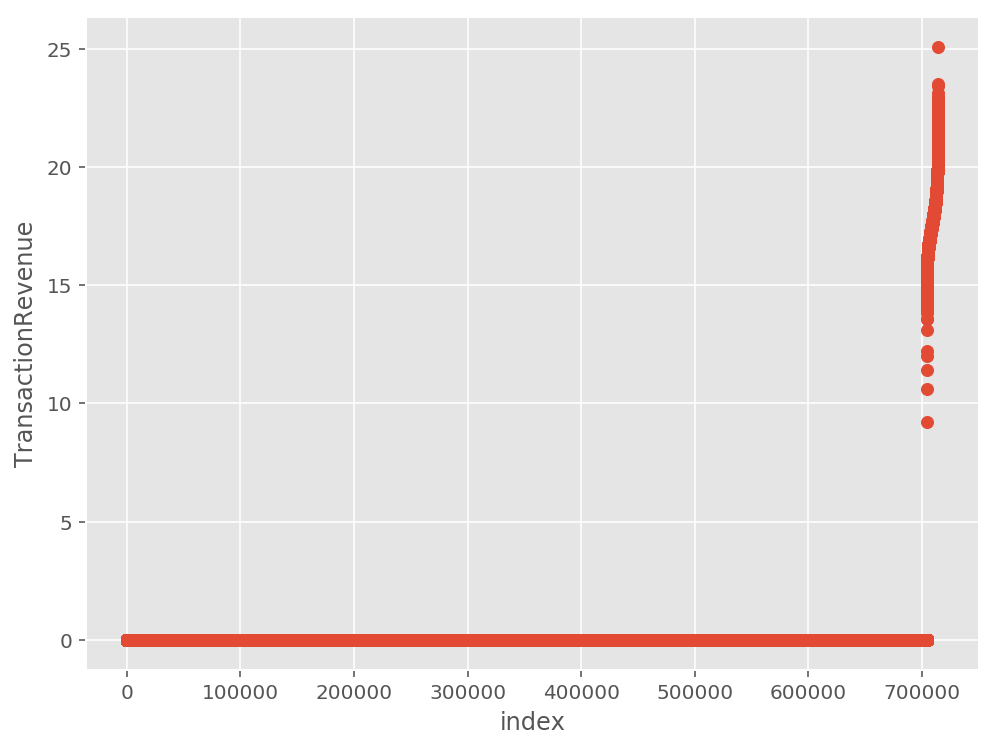

In [99]:
train["totals.transactionRevenue"] = train["totals.transactionRevenue"].astype('float')
gdf = train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()